In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from scipy.stats import zscore
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PowerTransformer
    from sklearn.model_selection import cross_val_score
    import joblib
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Insurance Claims- Fraud Detection",sep=",")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Above details shows the  dataset being imported

In [3]:
pd.set_option("display.max_columns",None)

The above code is used to show the whole details

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
pd.set_option("display.max_",None)

In [101]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1.0,1000,1406.91,0,1.0,4.0,2.0,0.0,53300,0,2.0,2.0,0.0,4.0,5,1,1.0,1,2,1.0,6510,13020,52080,1.0
1,228,1.0,2000,1197.22,5000000,1.0,4.0,6.0,2.0,0,0,3.0,1.0,1.0,4.0,8,1,0.0,0,0,0.0,780,780,3510,1.0
2,134,0.0,2000,1413.14,5000000,0.0,6.0,11.0,3.0,35100,0,0.0,1.0,1.0,4.0,7,3,0.0,2,3,0.0,7700,3850,23100,0.0
3,256,1.0,2000,1415.74,6000000,0.0,6.0,1.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,5,1,0.0,1,2,0.0,6340,6340,50720,1.0
4,228,2.0,1000,1583.91,6000000,1.0,0.0,11.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,20,1,0.0,0,1,0.0,1300,650,4550,0.0


In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

All columns in dataset

In [9]:
df=pd.DataFrame(data=df)

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We have both object,integer and float data type values in all columns

In [11]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Shows number of rows,null values and datatypes

In [13]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As we can see there are null values in _c39 column

<AxesSubplot:>

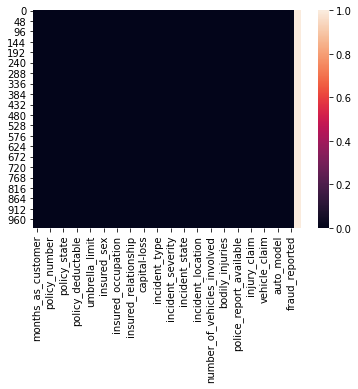

In [14]:
sns.heatmap(df.isnull())

The above heat map shows there are no null values

In [15]:
df.replace('?', np.nan, inplace = True)

We have replaced ? with NaN values 

In [20]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As we can see there are null values in few columns

In [19]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [21]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [22]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

We have replaced null values with mode method

In [23]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

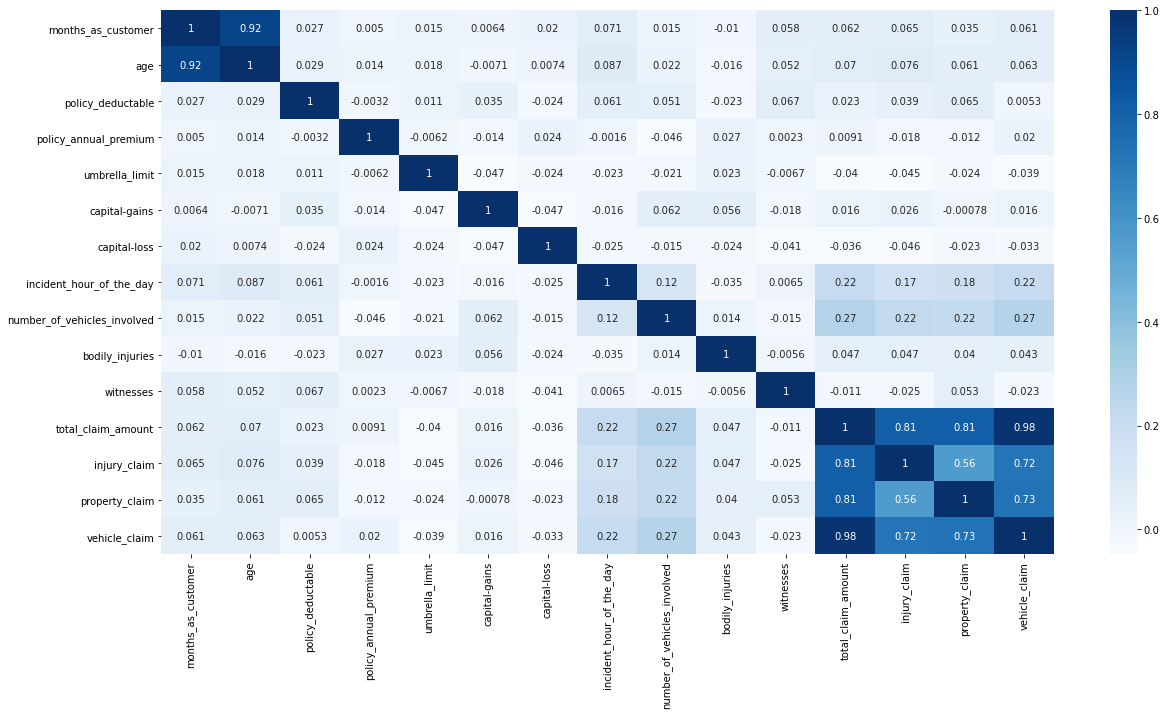

In [31]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

In [25]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [26]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

In [27]:
df.drop(to_drop, inplace = True, axis = 1)

dropping columns which are not necessary for prediction

In [28]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


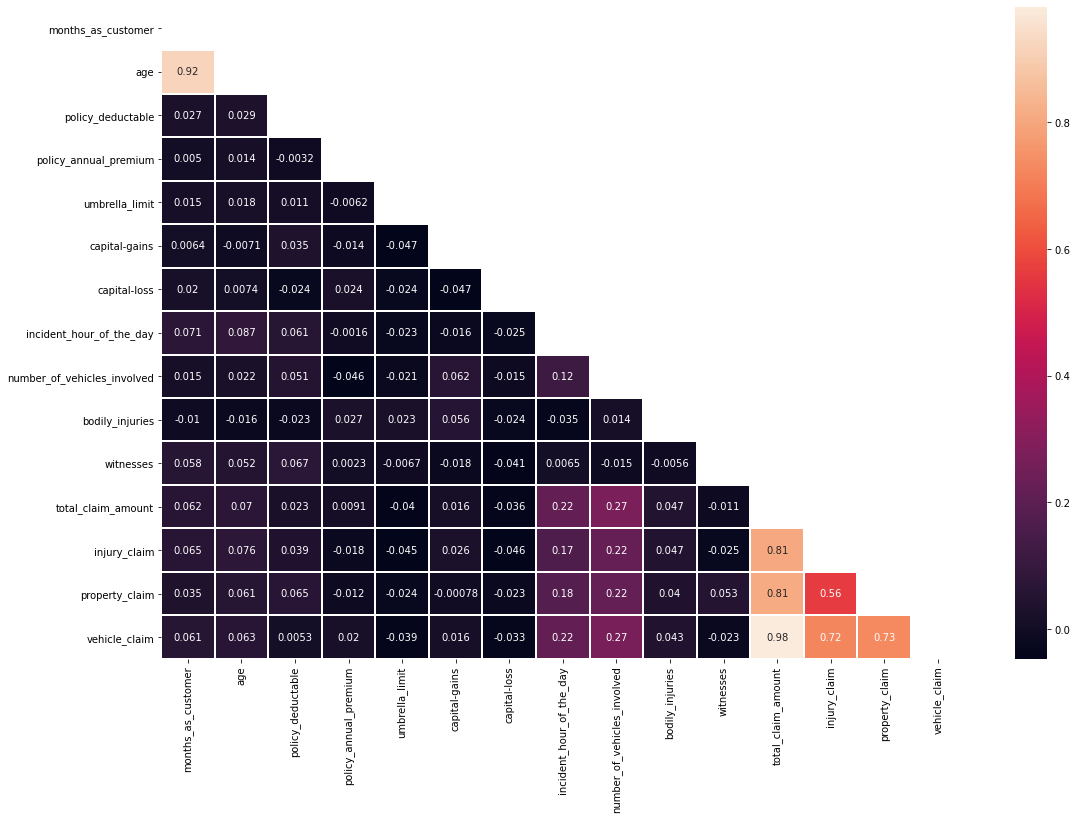

In [32]:
plt.figure(figsize = (18, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [33]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [34]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [36]:
df.dtypes

months_as_customer               int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported                  object
dtype: object

We have both object,integer and float data type values in all columns

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

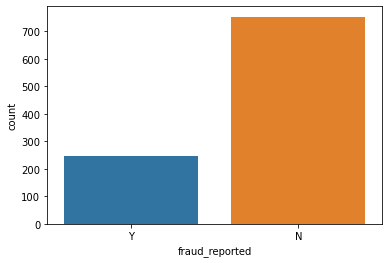

In [38]:
sns.countplot(df["fraud_reported"])

we have 2 classes and are not eqalily distributed,there is class imbalance issue 

In [39]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Total number of Yes and  No values in target variable

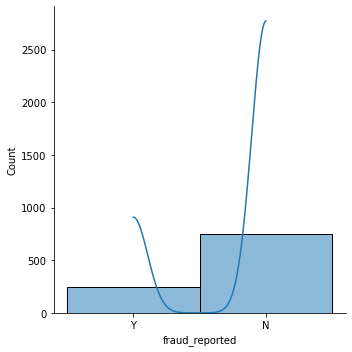

In [37]:
 sns.displot(df["fraud_reported"],bins=5,kde=True)

The above distribution plot for fraud_reported

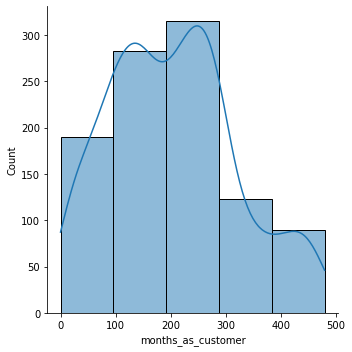

In [40]:
 sns.displot(df["months_as_customer"],bins=5,kde=True)

The above distribution plot for months_as_customer

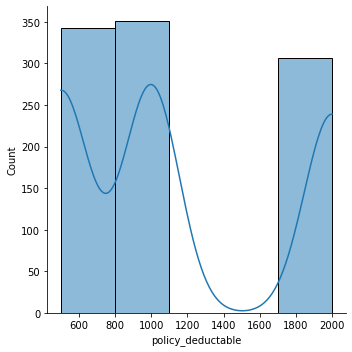

In [41]:
 sns.displot(df["policy_deductable"],bins=5,kde=True)

The above distribution plot for policy_deductable

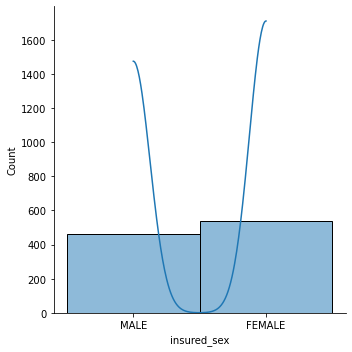

In [42]:
 sns.displot(df["insured_sex"],bins=5,kde=True)

The above distribution plot for insured_sex

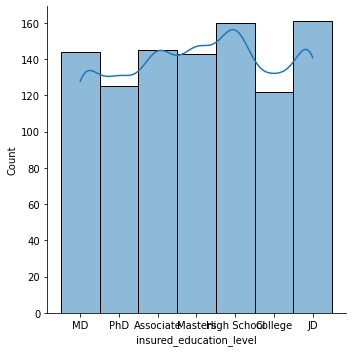

In [43]:
 sns.displot(df["insured_education_level"],bins=5,kde=True)

The above distribution plot for insured_education_level

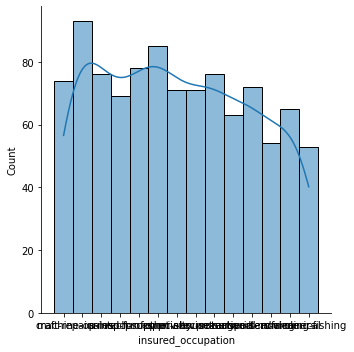

In [44]:
 sns.displot(df["insured_occupation"],bins=5,kde=True)

The above distribution plot for insured_occupation

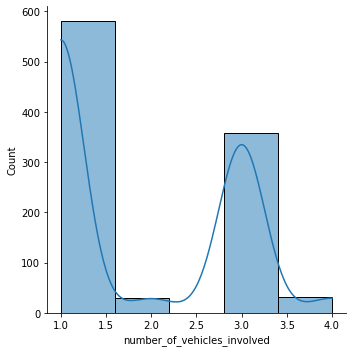

In [45]:
sns.displot(df["number_of_vehicles_involved"],bins=5,kde=True)

The above distribution plot for number_of_vehicles_involved

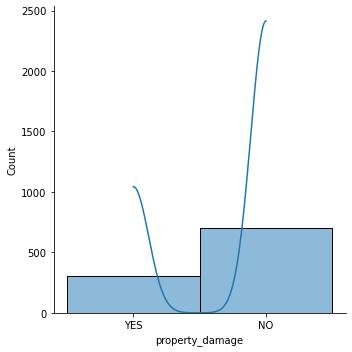

In [46]:
sns.displot(df["property_damage"],bins=5,kde=True)

The above distribution plot for property_damage

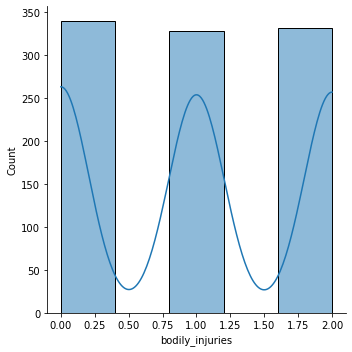

In [47]:
sns.displot(df["bodily_injuries"],bins=5,kde=True)

The above distribution plot for bodily_injuries

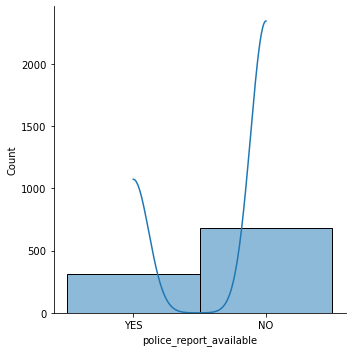

In [48]:
sns.displot(df["police_report_available"],bins=5,kde=True)

The above distribution plot for police_report_available

<AxesSubplot:xlabel='count', ylabel='police_report_available'>

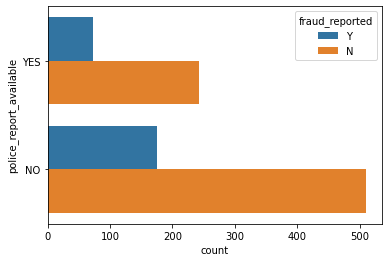

In [50]:
sns.countplot(y=df['police_report_available'], hue=df['fraud_reported'])

This shows the count plot for police_report_available and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='witnesses'>

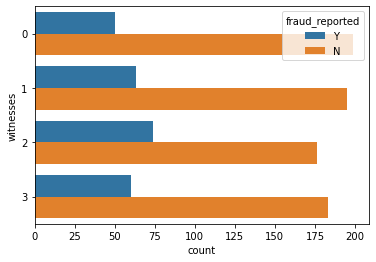

In [51]:
sns.countplot(y=df['witnesses'], hue=df['fraud_reported'])

This shows the count plot for witnesses and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='bodily_injuries'>

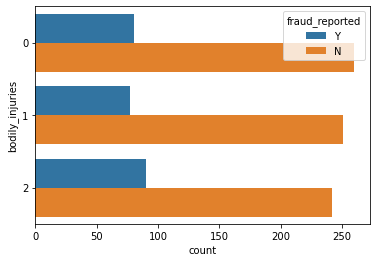

In [52]:
sns.countplot(y=df['bodily_injuries'], hue=df['fraud_reported'])

This shows the count plot for bodily_injuries and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='property_damage'>

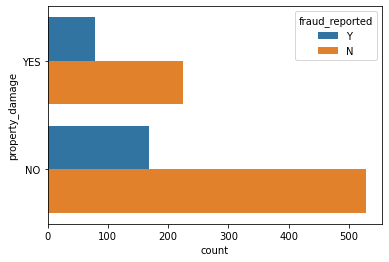

In [53]:
sns.countplot(y=df['property_damage'], hue=df['fraud_reported'])

This shows the count plot for property_damage and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='number_of_vehicles_involved'>

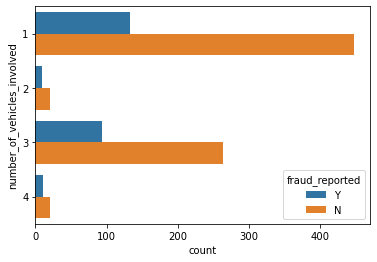

In [54]:
sns.countplot(y=df['number_of_vehicles_involved'], hue=df['fraud_reported'])

This shows the count plot for number_of_vehicles_involved and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='authorities_contacted'>

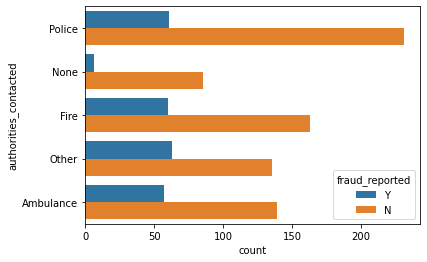

In [55]:
sns.countplot(y=df['authorities_contacted'], hue=df['fraud_reported'])

This shows the count plot for authorities_contacted and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

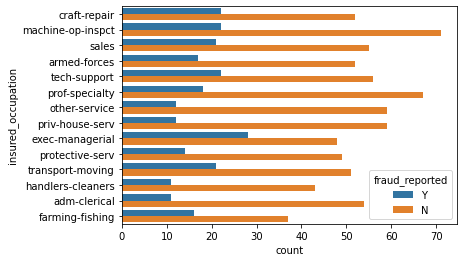

In [56]:
sns.countplot(y=df['insured_occupation'], hue=df['fraud_reported'])

This shows the count plot for insured_occupation and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='insured_education_level'>

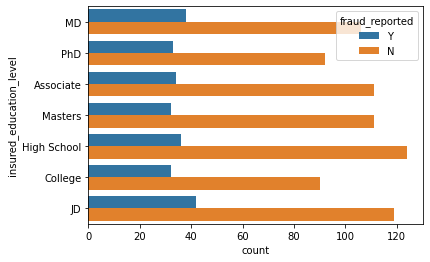

In [57]:
sns.countplot(y=df['insured_education_level'], hue=df['fraud_reported'])

This shows the count plot for insured_education_level and fraud_reported. 

<AxesSubplot:xlabel='count', ylabel='insured_sex'>

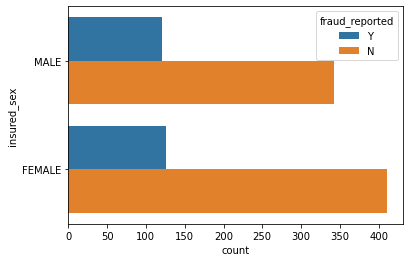

In [58]:
sns.countplot(y=df['insured_sex'], hue=df['fraud_reported'])

This shows the count plot for insured_sex and fraud_reported. 

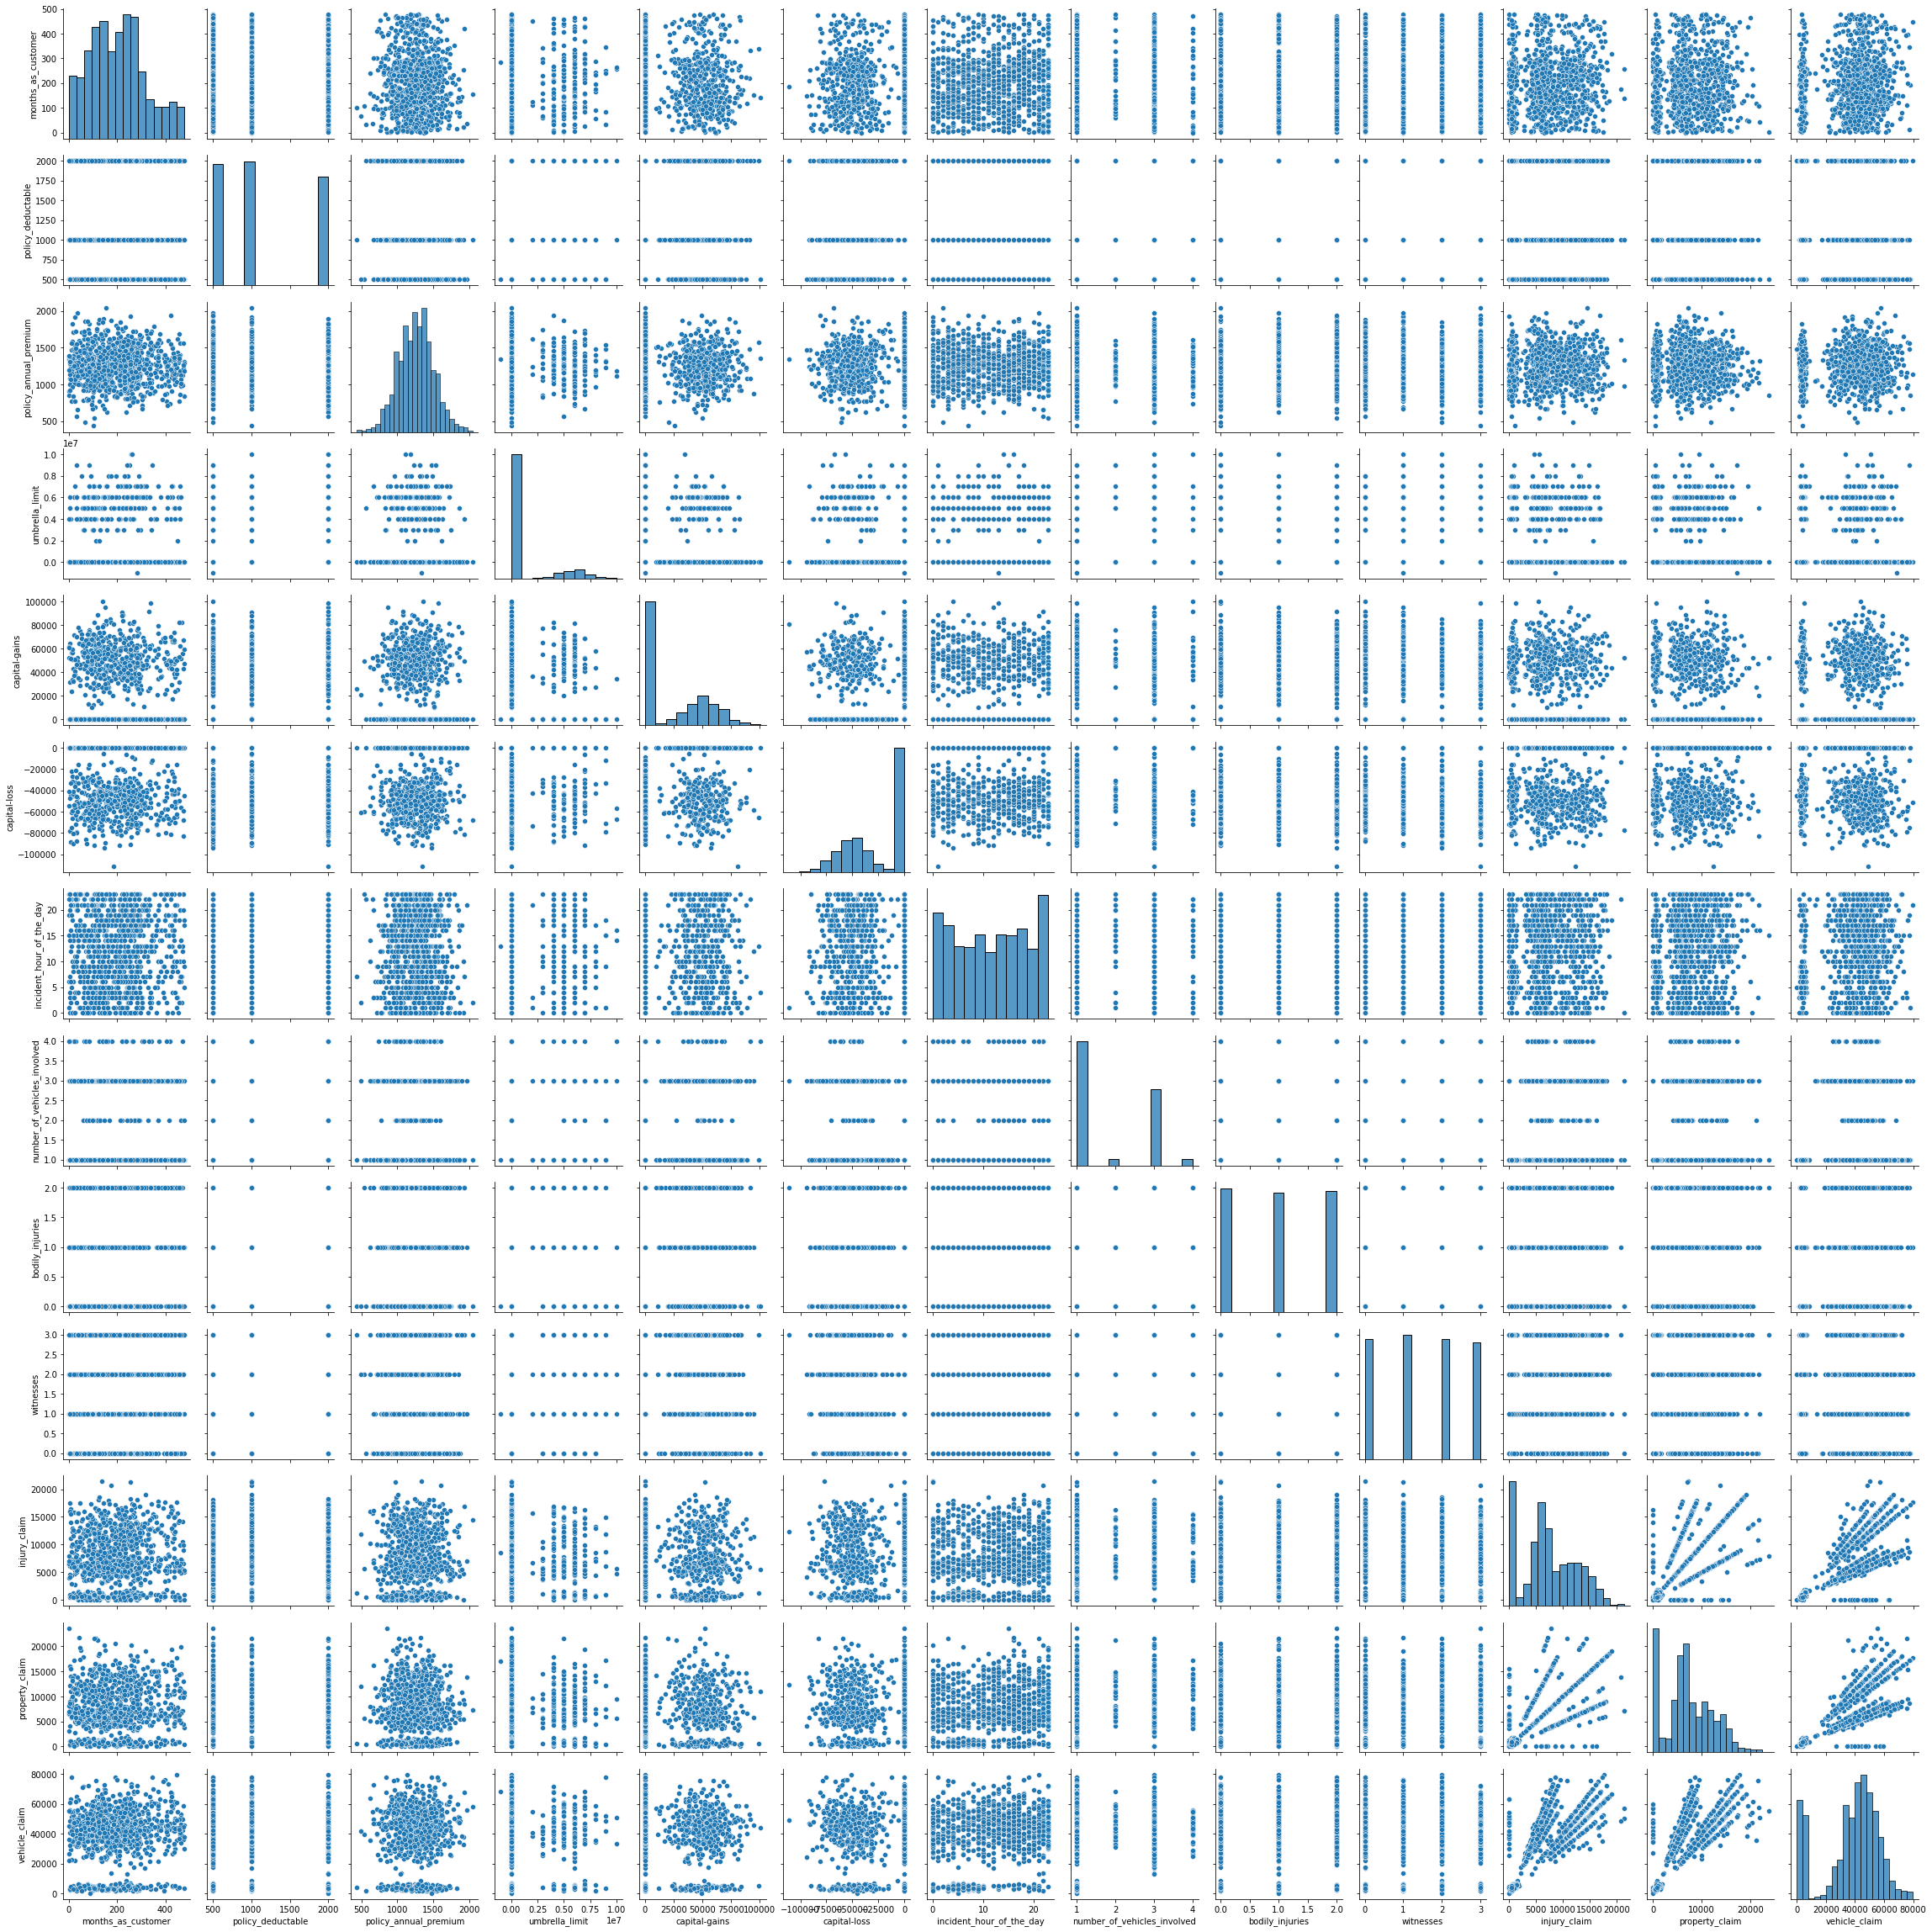

In [60]:
sns.pairplot(df)

The above details show the pair plot with respect to target variable

In [98]:
collist=df.columns.values
ncol=16
nrows=29

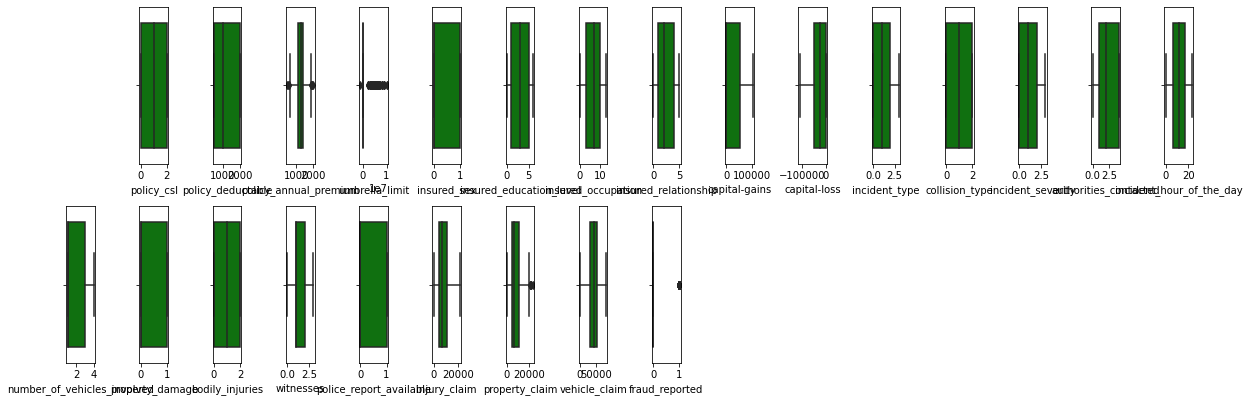

In [99]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
plt.tight_layout()

The above details shows Boxplot for few columns

# Ordinal Encoding

In [61]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [62]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [63]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1.0,1000,1406.91,0,1.0,4.0,2.0,0.0,53300,0,2.0,2.0,0.0,4.0,5,1,1.0,1,2,1.0,6510,13020,52080,1.0
1,228,1.0,2000,1197.22,5000000,1.0,4.0,6.0,2.0,0,0,3.0,1.0,1.0,4.0,8,1,0.0,0,0,0.0,780,780,3510,1.0
2,134,0.0,2000,1413.14,5000000,0.0,6.0,11.0,3.0,35100,0,0.0,1.0,1.0,4.0,7,3,0.0,2,3,0.0,7700,3850,23100,0.0
3,256,1.0,2000,1415.74,6000000,0.0,6.0,1.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,5,1,0.0,1,2,0.0,6340,6340,50720,1.0
4,228,2.0,1000,1583.91,6000000,1.0,0.0,11.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,20,1,0.0,0,1,0.0,1300,650,4550,0.0


In [64]:
df.dtypes

months_as_customer               int64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available        float64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
fraud_reported                 float64
dtype: object

As we can see all columns are conveted into integer and float datatype

In [65]:
df.skew()

months_as_customer             0.362177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051


As we see skewness is not in the range -0.50 and +0.50

# Zscore for removing outliers

In [66]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4, 22,  4,  4,  4,  3, 10,
        4,  4,  4], dtype=int64))


In [67]:
    print("shape before removing the outliers",df.shape)
    df_new=df[(zscr<3).all(axis=1)]
    print("shape after removing the outliers",df_new.shape)

shape before removing the outliers (1000, 25)
shape after removing the outliers (980, 25)


In [68]:
Dataloss=((1000-980)/1000)*100
Dataloss

2.0

In [69]:
df_new.skew()

months_as_customer             0.362608
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
fraud_reported                 1.188267


# Seperating columns into Independent variables and target variables

In [70]:
x=df_new.drop("fraud_reported",axis=1)
y=df_new[["fraud_reported"]]

# Power transformation Method

In [71]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [72]:
df_new2.skew()

months_as_customer            -0.133972
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
umbrella_limit                -7.932397
insured_sex                    0.139324
insured_education_level       -0.187642
insured_occupation            -0.238129
insured_relationship          -0.160168
capital-gains                  0.031294
capital-loss                   0.088750
incident_type                 -0.095572
collision_type                -0.129037
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_hour_of_the_day      -0.258027
number_of_vehicles_involved    0.372833
property_damage                0.853093
bodily_injuries               -0.133824
witnesses                     -0.151669
police_report_available        0.796221
injury_claim                  -0.416732
property_claim                -0.357397
vehicle_claim                 -0.521805
dtype: float64

# Standard Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [74]:
x.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,1.044541,0.189051,0.063154,0.623999,-0.337086,1.071971,0.571955,-1.152452,-1.565143,1.028989,1.048516,0.819662,1.313738,-1.369547,1.156859,-0.916935,-0.839387,1.512809,0.094895,0.523536,1.473608,0.008582,1.089802,0.758130
1,0.299045,0.189051,1.271808,-0.241075,1.482455,1.071971,0.571955,-0.086335,-0.148870,-0.986627,1.048516,1.442602,0.006587,-0.067080,1.156859,-0.447636,-0.839387,-0.661022,-1.264943,-1.406436,-0.678606,-1.522095,-1.563723,-1.787485
2,-0.515819,-1.231867,1.271808,0.649541,1.482455,-0.932861,1.459110,1.056805,0.419239,0.955106,1.048516,-1.130123,0.006587,-0.067080,1.156859,-0.599018,1.194880,-0.661022,1.177809,1.292411,-0.678606,0.226178,-0.582075,-0.820246
3,0.517526,0.189051,1.271808,0.660199,1.788485,-0.932861,1.459110,-1.463499,0.938269,1.013773,-1.006291,0.819662,-1.436731,-1.369547,1.156859,-0.916935,-0.839387,-0.661022,0.094895,0.523536,-0.678606,-0.023878,-0.036218,0.681832
4,0.299045,1.233389,0.063154,1.346451,1.788485,1.071971,-1.626734,1.056805,0.938269,1.066686,-0.941672,1.442602,0.006587,-0.067080,-0.032665,1.144669,-0.839387,-0.661022,-1.264943,-0.348068,-0.678606,-1.300517,-1.628274,-1.740862


# Train test split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(764, 24)
(216, 24)
(764, 1)
(216, 1)


# Logistic Regression

In [76]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7314814814814815
[[140  16]
 [ 42  18]]
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       156
         1.0       0.53      0.30      0.38        60

    accuracy                           0.73       216
   macro avg       0.65      0.60      0.61       216
weighted avg       0.70      0.73      0.70       216



# GaussianNB and its accuracy score

In [77]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score :
0.7638888888888888
[[130  26]
 [ 25  35]]
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       156
         1.0       0.57      0.58      0.58        60

    accuracy                           0.76       216
   macro avg       0.71      0.71      0.71       216
weighted avg       0.77      0.76      0.76       216



# Support Vector Classifier

In [78]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.7314814814814815
[[148   8]
 [ 50  10]]
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       156
         1.0       0.56      0.17      0.26        60

    accuracy                           0.73       216
   macro avg       0.65      0.56      0.55       216
weighted avg       0.69      0.73      0.68       216



# Decision Tree Classifier

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.6990740740740741
[[128  28]
 [ 37  23]]
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       156
         1.0       0.45      0.38      0.41        60

    accuracy                           0.70       216
   macro avg       0.61      0.60      0.61       216
weighted avg       0.69      0.70      0.69       216



# KNeighbors Classifier

In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score :
0.7129629629629629
[[145  11]
 [ 51   9]]
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       156
         1.0       0.45      0.15      0.23        60

    accuracy                           0.71       216
   macro avg       0.59      0.54      0.52       216
weighted avg       0.66      0.71      0.66       216



# Support vector classifier with different kernel

In [81]:
sv=SVC(kernel="poly")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.7268518518518519
[[153   3]
 [ 56   4]]
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84       156
         1.0       0.57      0.07      0.12        60

    accuracy                           0.73       216
   macro avg       0.65      0.52      0.48       216
weighted avg       0.69      0.73      0.64       216



In [82]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.7314814814814815
[[148   8]
 [ 50  10]]
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       156
         1.0       0.56      0.17      0.26        60

    accuracy                           0.73       216
   macro avg       0.65      0.56      0.55       216
weighted avg       0.69      0.73      0.68       216



# Ensemble Methods using Random forest and Ada booster

In [83]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score :
0.7361111111111112
[[144  12]
 [ 45  15]]
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       156
         1.0       0.56      0.25      0.34        60

    accuracy                           0.74       216
   macro avg       0.66      0.59      0.59       216
weighted avg       0.70      0.74      0.70       216



In [84]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

accuracy score :
0.7361111111111112
[[136  20]
 [ 37  23]]
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       156
         1.0       0.53      0.38      0.45        60

    accuracy                           0.74       216
   macro avg       0.66      0.63      0.64       216
weighted avg       0.72      0.74      0.72       216



# Cross validation method

In [85]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.79591837 0.79081633 0.7244898  0.79591837 0.81122449]
0.7836734693877552


In [93]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.79081633 0.72959184 0.72959184 0.81632653 0.81632653]
0.7765306122448979


In [86]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.77040816 0.75       0.7244898  0.7755102  0.7755102 ]
0.7591836734693878


In [87]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.69897959 0.68877551 0.66836735 0.73469388 0.70918367]
0.7


In [88]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.7755102  0.75       0.72959184 0.73979592 0.76530612]
0.7520408163265306


In [89]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.81122449 0.76530612 0.73979592 0.77040816 0.79591837]
0.7765306122448979


In [90]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.79081633 0.73469388 0.73469388 0.79081633 0.79591837]
0.7693877551020408


# Saving the best model accuracy

In [94]:
import pickle
filename="Insurance Claims- Fraud Detection.pkl"
pickle.dump(gnb,open(filename,"wb"))

# Conclusion

In [95]:
loaded_model=pickle.load(open("Insurance Claims- Fraud Detection.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.7638888888888888


In [96]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

fraud_reported
1.0               740
0.0               740
dtype: int64

We can see now the target variable is equally distributed

In [97]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
Predicted,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Original,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
